# Homework 1.3 | Time Series — Solutions

*Homework is designed to both test your knowledge and challenge you to apply familiar concepts in new applications. Answer clearly and completely. You are welcomed and encouraged to work in groups so long as your work is your own. Submit your figures and answers to Gradescope.*

In [ ]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File Path
file_path = 'https://tayweid.github.io/econ-0150/parts/part-1-3/data/'

## Q1. US Economic Growth

The dataset `us_real_gdp.csv` contains annual US Real GDP (in trillions of dollars) from 1970 to 2023.

In [ ]:
# Load Data
gdp = pd.read_csv(file_path + 'us_real_gdp.csv')
gdp.head()

,Year,Real_GDP
0,1970,5.316
1,1971,5.491
2,1972,5.780
3,1973,6.106
4,1974,6.073


**a) What is the data structure of this dataset?**

**Time series data.** We observe a single entity (the US) across multiple time periods (years). The index variable is Year.

**b) Create a line graph of US Real GDP over time.**

Text(0.5, 1.0, 'US Real GDP (Trillions of Dollars)')

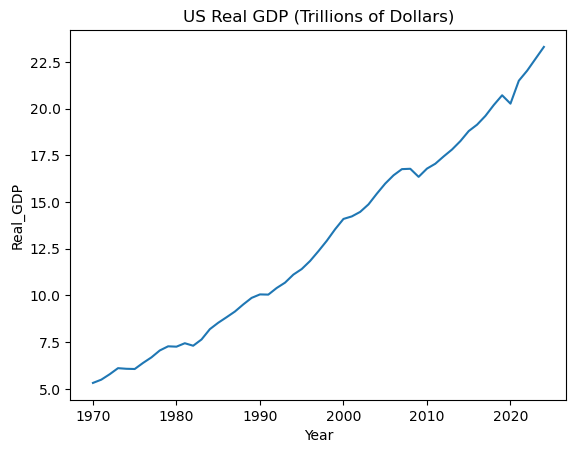

In [ ]:
sns.lineplot(gdp, x='Year', y='Real_GDP')
plt.title('US Real GDP (Trillions of Dollars)')

**c) Describe the overall trend. Are there any periods where the trend changes noticeably?**

The overall trend is upward — US Real GDP has grown substantially from about 5 trillion in 1970 to over 20 trillion by 2023. There are noticeable dips during recessions (early 1980s, 2008-2009 financial crisis, and 2020 COVID pandemic), but the economy recovers each time and continues growing.

## Q2. US Economic Growth Rates

Use the same `us_real_gdp.csv` dataset to create a new column that calculates the **annual growth rate** of Real GDP. The growth rate formula is:

$$g_t = \frac{GDP_t - GDP_{t-1}}{GDP_{t-1}}$$

**a) Create a line graph of the growth rate over time.**

Text(0, 0.5, 'Growth Rate')

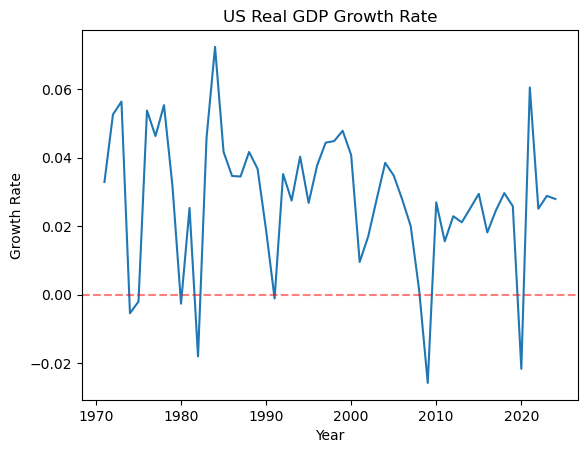

In [ ]:
# Calculate the growth rate
gdp['growth_rate'] = (gdp['Real_GDP'] - gdp['Real_GDP'].shift(1)) / gdp['Real_GDP'].shift(1)

# Plot the growth rate
sns.lineplot(gdp, x='Year', y='growth_rate')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.title('US Real GDP Growth Rate')
plt.ylabel('Growth Rate')

**b) In which years did the US economy shrink (negative growth)?**

In [ ]:
# Find years with negative growth
gdp[gdp['growth_rate'] < 0][['Year', 'growth_rate']]

,Year,growth_rate
4,1974,-0.005405
5,1975,-0.001976
10,1980,-0.002611
12,1982,-0.018008
21,1991,-0.001094
39,2009,-0.025743
50,2020,-0.021626


The US economy shrank in years including 1974-75 (oil crisis), 1980 and 1982 (stagflation/Volcker recession), 1991 (early 90s recession), 2008-2009 (financial crisis), and 2020 (COVID-19 pandemic). These correspond to major economic shocks — oil price spikes, monetary policy tightening to fight inflation, financial market collapses, and the pandemic shutdown.

**c) What is the average growth rate over this period?**

In [ ]:
gdp['growth_rate'].mean()

0.027943876859457387

The average annual growth rate is approximately 2.7% (value may vary slightly depending on exact data).

## Q3. Seasonal Patterns in Coffee Prices

The dataset `Monthly_Coffee_Prices.csv` contains monthly coffee prices from 1973 to 2025.

In [ ]:
# Load Data
prices = pd.read_csv(file_path + 'Monthly_Coffee_Prices.csv', index_col=0)
prices['date'] = pd.to_datetime(prices['date'])
prices.head()

,date,price,month,year
0,1973-08-01,0.654840,August,1973
1,1973-09-01,0.652700,September,1973
2,1973-10-01,0.659552,October,1973
3,1973-11-01,0.646810,November,1973
4,1973-12-01,0.670937,December,1973


**a) Create a multi-boxplot of coffee prices grouped by month.**

Text(0.5, 0, 'Price')

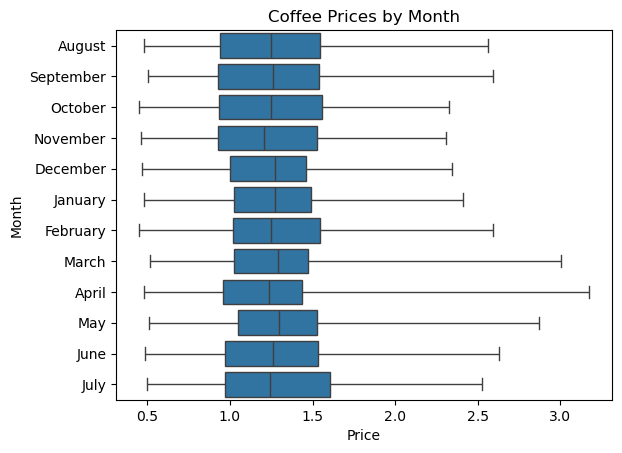

In [ ]:
sns.boxplot(prices, y='month', x='price', whis=(0,100))
plt.title('Coffee Prices by Month')
plt.ylabel('Month')
plt.xlabel('Price')

**b) Which month has the highest median price?**

In [ ]:
# Calculate median price by month
prices.groupby('month')['price'].median()

month
April        1.234080
August       1.245864
December     1.275119
February     1.248789
January      1.271000
July         1.243857
June         1.260064
March        1.291295
May          1.297150
November     1.206270
October      1.245976
September    1.261201
Name: price, dtype: float64

The highest median price is in May.

**c) Which months show the most price variability (largest range)?**

The highest variability in price happens in April.

**d) Based on your multi-boxplot, is there a clear seasonal pattern in coffee prices? Explain in one sentence.**

There is no strong seasonal pattern in coffee prices. The medians and distributions across months are fairly similar, suggesting that month-to-month variation is less important than year-to-year variation driven by supply shocks, weather events, and global market conditions.

## Q4. Choosing the Right Visualization

You've now created line graphs (Q1-Q2) and a multi-boxplot (Q3).

**a) If you wanted to know whether coffee prices are higher today than in 2000, which visualization would you use?**

**A line graph.** A line graph shows prices over time, so you can directly compare the price level at different points in time (2000 vs today).

**b) If you wanted to know whether coffee prices tend to be higher in certain months, which visualization would you use?**

**A multi-boxplot grouped by month.** This shows the distribution of prices for each month across all years, making it easy to compare whether certain months consistently have higher or lower prices.